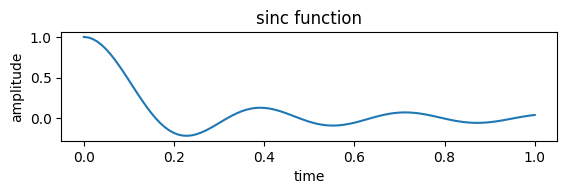

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define Time Vector and Original Signal
t = np.arange(0, 1.01, 0.01)
m = np.sinc(2 * np.pi * t)

# Plot the Original Signal
plt.subplot(3, 1, 1)
plt.plot(t, m)
plt.title('sinc function')
plt.xlabel('time')
plt.ylabel('amplitude')

# Quantization
d = 2 * np.pi / 100
e = np.zeros(100)
eq = np.zeros(100)
mq = np.zeros(100)

for n in range(100):
    if n == 0:
        e[n] = m[n]
        eq[n] = d * np.sign(e[n])
        mq[n] = 0
    else:
        e[n] = m[n] - mq[n - 1]
        eq[n] = d * np.sign(e[n])
        mq[n] = mq[n - 1] + eq[n]

# Encode Data
enData = np.zeros(100)
enData[0] = mq[0]

# Control Logic (Assuming 1 for increased values, 0 for decreased values)
for i in range(1, 100):
    if mq[i] > mq[i - 1]:
        enData[i] = 1
    elif mq[i] < mq[i - 1]:
        enData[i] = 0
    else:
        enData[i] = enData[i - 1]  # No change, retain the previous value

# Show the plots
plt.show()


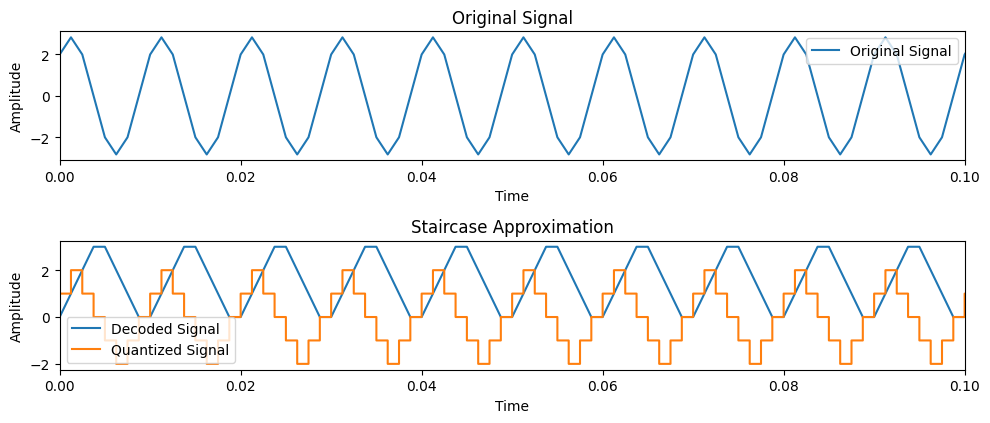

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Function to encode a signal using a Delta Modulator Encoder
def delta_modulator_encoder(signal, step_size):
    quantized_signal = np.zeros_like(signal)
    error = np.zeros_like(signal)

    for i in range(1, len(signal)):
        error[i] = signal[i] - quantized_signal[i - 1]
        quantized_signal[i] = (quantized_signal[i - 1] + step_size * np.sign(error[i]))

    return quantized_signal, error

# Function to decode a signal using a Delta Modulator Decoder
def delta_modulator_decoder(quantized_signal, step_size):
    decoded_signal = np.zeros_like(quantized_signal)

    for i in range(1, len(quantized_signal)):
        decoded_signal[i] = decoded_signal[i - 1] + step_size * np.sign(quantized_signal[i])

    return decoded_signal

# Generate a sinusoidal signal
fs = 800  # Sampling frequency
# fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)
sinusoidal_signal = 2 * np.sin(2 * np.pi * 100 * t) + 2 * np.cos(2 * np.pi * 100 * t)   # 5 Hz sinusoidal signal

# Parameters for Delta Modulator
step_size = 1

# Encode the signal using Delta Modulator
quantized_signal, error = delta_modulator_encoder(sinusoidal_signal, step_size)

# Decode the signal using Delta Modulator
decoded_signal = delta_modulator_decoder(quantized_signal, step_size)

# Plot the original and quantized signals
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, sinusoidal_signal, label='Original Signal')
plt.xlim(0.0,0.1)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, decoded_signal, label='Decoded Signal')
plt.title('Decoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# plt.subplot(3, 1, 2)
plt.plot(t, quantized_signal, label='Quantized Signal', drawstyle='steps-pre')
plt.xlim(0.0,0.1)
plt.title('Staircase Approximation')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()


plt.tight_layout()
plt.show()


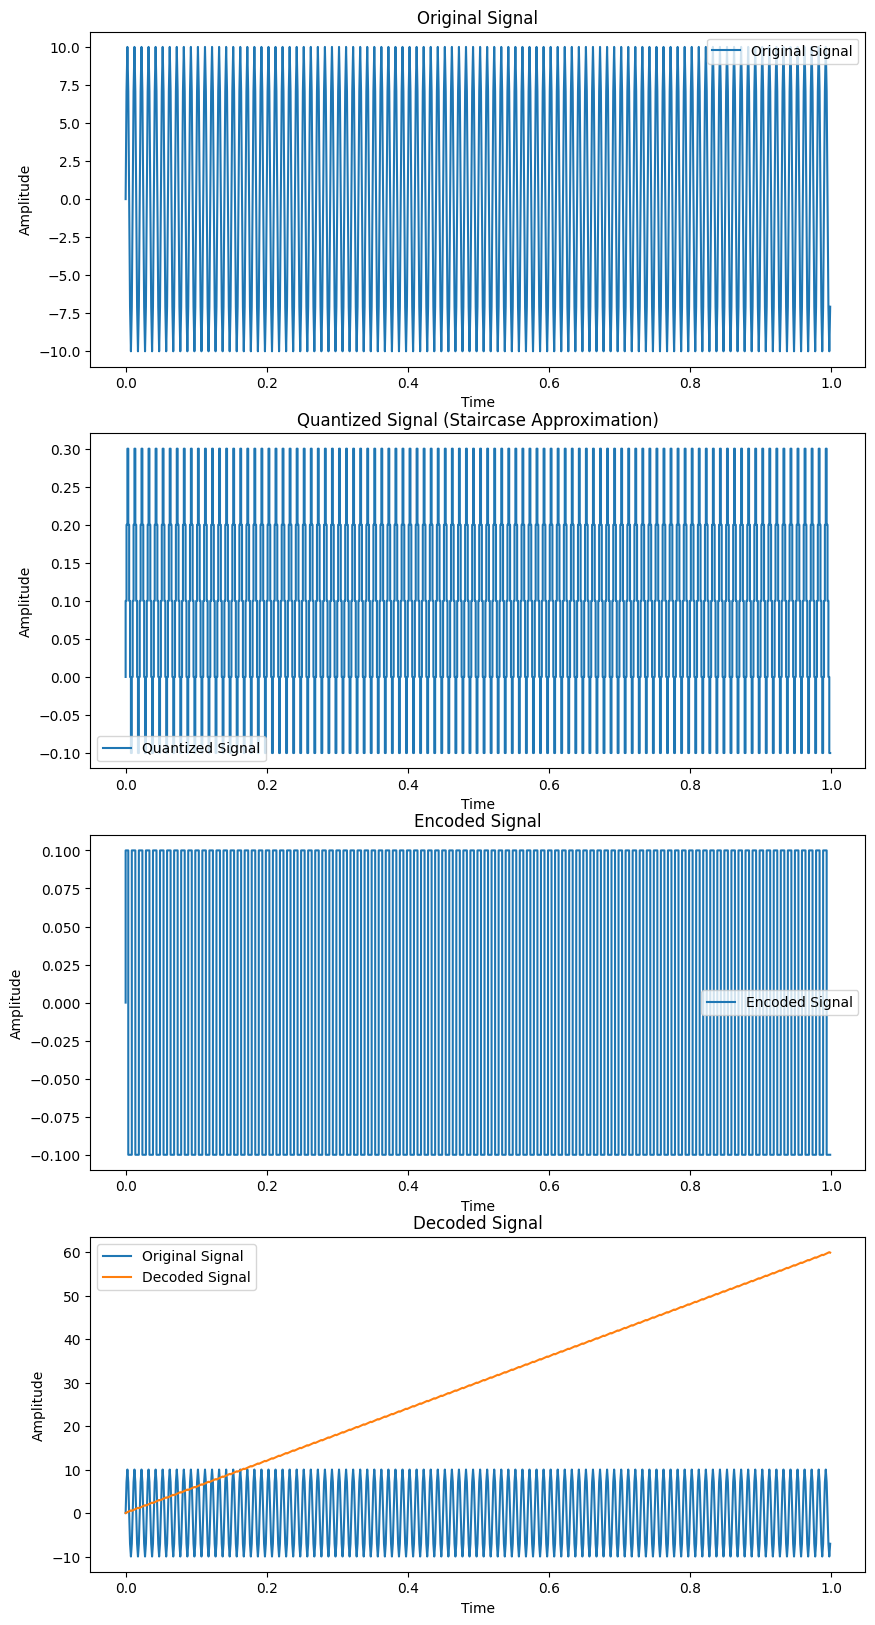

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Function to encode a signal using a Delta Modulator Encoder
def delta_modulator_encoder(signal, step_size):
    quantized_signal = np.zeros_like(signal)
    error = np.zeros_like(signal)

    for i in range(1, len(signal)):
        error[i] = signal[i] - quantized_signal[i - 1]
        quantized_signal[i] = quantized_signal[i - 1] + step_size * np.sign(error[i])

    return quantized_signal, error

# Function to decode a signal using a Delta Modulator Decoder
def delta_modulator_decoder(quantized_signal, step_size):
    decoded_signal = np.zeros_like(quantized_signal)

    for i in range(1, len(quantized_signal)):
        decoded_signal[i] = decoded_signal[i - 1] + step_size * np.sign(quantized_signal[i])

    return decoded_signal

# Generate a sinusoidal signal
fs = 800  # Sampling frequency
t = np.arange(0, 1, 1/fs)
sinusoidal_signal = 5 * np.sin(2 * np.pi * 100 * t) + 5 * np.sin(2 * np.pi * 100 * t)  # 5 Hz sinusoidal signal

# Parameters for Delta Modulator
step_size = 0.1

# Encode the signal using Delta Modulator
quantized_signal, error = delta_modulator_encoder(sinusoidal_signal, step_size)

# Decode the signal using Delta Modulator
decoded_signal = delta_modulator_decoder(quantized_signal, step_size)

# Plot the original, quantized, encoded, and decoded signals
plt.figure(figsize=(10, 20))

plt.subplot(4, 1, 1)
plt.plot(t, sinusoidal_signal, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(t, quantized_signal, label='Quantized Signal', drawstyle='steps-pre')
plt.title('Quantized Signal (Staircase Approximation)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Encode the signal using Delta Modulator for plotting
encoded_signal = np.zeros_like(quantized_signal)
encoded_signal[0] = quantized_signal[0]
for i in range(1, len(quantized_signal)):
    encoded_signal[i] = quantized_signal[i] - quantized_signal[i - 1]

plt.subplot(4, 1, 3)
plt.plot(t, encoded_signal, label='Encoded Signal', drawstyle='steps-pre')
plt.title('Encoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(t, sinusoidal_signal, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# plt.subplot(4, 1, 4)
plt.plot(t, decoded_signal, label='Decoded Signal')
plt.title('Decoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.show()


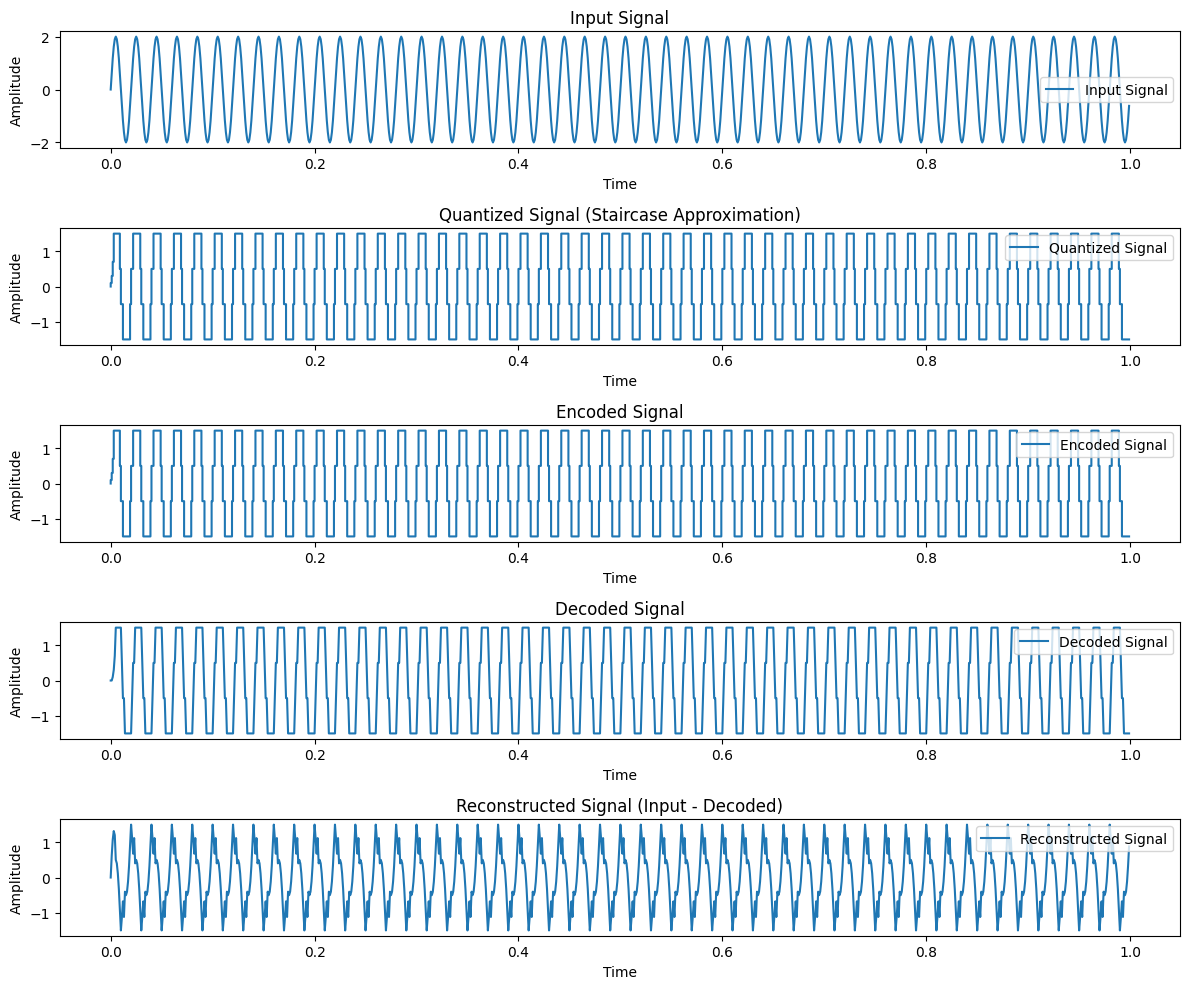

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def adaptive_delta_modulation_encoder(signal, step_size_initial, step_size_min, step_size_max):
    quantized_signal = np.zeros_like(signal)
    step_size = step_size_initial

    for i in range(1, len(signal)):
        error = signal[i] - quantized_signal[i - 1]
        if np.abs(error) > step_size:
            quantized_signal[i] = quantized_signal[i - 1] + step_size * np.sign(error)
            step_size = np.clip(step_size * 2, step_size_min, step_size_max)
        else:
            quantized_signal[i] = quantized_signal[i - 1]

    return quantized_signal

def adaptive_delta_modulation_decoder(quantized_signal):
    decoded_signal = np.zeros_like(quantized_signal)

    for i in range(1, len(quantized_signal)):
        decoded_signal[i] = quantized_signal[i - 1]

    return decoded_signal

# Generate a sinusoidal signal
fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)
sinusoidal_signal = 2 * np.sin(2 * np.pi * 50 * t)  # 5 Hz sinusoidal signal

# Parameters for Adaptive Delta Modulation
step_size_initial = 0.1
step_size_min = 0.01
step_size_max = 1.0

# Encode the signal using Adaptive Delta Modulation
quantized_signal = adaptive_delta_modulation_encoder(sinusoidal_signal, step_size_initial, step_size_min, step_size_max)

# Decode the signal using Adaptive Delta Modulation
decoded_signal = adaptive_delta_modulation_decoder(quantized_signal)

# Plot the original, quantized, and decoded signals
plt.figure(figsize=(12, 10))

plt.subplot(5, 1, 1)
plt.plot(t, sinusoidal_signal, label='Input Signal')
plt.title('Input Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(t, quantized_signal, label='Quantized Signal', drawstyle='steps-pre')
plt.title('Quantized Signal (Staircase Approximation)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(t, quantized_signal, label='Encoded Signal', drawstyle='steps-pre')
plt.title('Encoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(t, decoded_signal, label='Decoded Signal')
plt.title('Decoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(t, sinusoidal_signal - decoded_signal, label='Reconstructed Signal')
plt.title('Reconstructed Signal (Input - Decoded)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


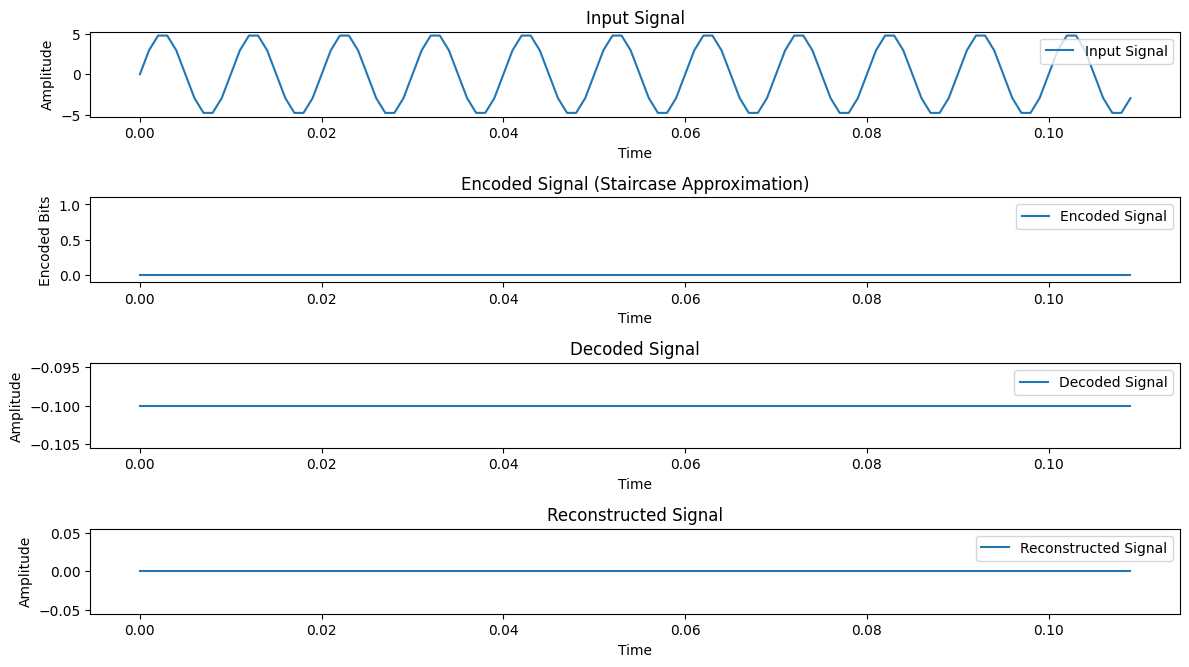

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Function to perform Adaptive Delta Modulation encoding
def adaptive_delta_modulation_encoder(signal, step_size, delta_min, delta_max):
    encoded_signal = []
    quantized_signal = 0

    for sample in signal:
        delta = step_size
        if quantized_signal > delta_max:
            quantized_signal -= delta_max
            encoded_signal.append(1)
        elif quantized_signal < -delta_min:
            quantized_signal += delta_max
            encoded_signal.append(0)
        else:
            encoded_signal.append(quantized_signal > 0)

        quantized_signal += delta if encoded_signal[-1] else -delta

    return np.array(encoded_signal)

# Function to perform Adaptive Delta Modulation decoding
def adaptive_delta_modulation_decoder(encoded_signal, step_size, delta_min, delta_max):
    decoded_signal = []
    quantized_signal = 0

    for bit in encoded_signal:
        delta = step_size
        if bit:
            quantized_signal += delta
        else:
            quantized_signal -= delta

        # Clip the quantized signal within the specified range
        quantized_signal = np.clip(quantized_signal, -delta_min, delta_max)

        decoded_signal.append(quantized_signal)

    return np.array(decoded_signal)

# Generate a sinusoidal signal
fs = 1000  # Sampling frequency
t = np.arange(0, 0.11, 1/fs)
sinusoidal_signal = 5 * np.sin(2 * np.pi * 100 * t)  # 5 Hz sinusoidal signal

# Parameters for Adaptive Delta Modulation (ADM)
step_size = 0.5
delta_min = 0.1
delta_max = 1.0

# Encode the signal using Adaptive Delta Modulation
encoded_signal = adaptive_delta_modulation_encoder(sinusoidal_signal, step_size, delta_min, delta_max)

# Decode the signal using Adaptive Delta Modulation
decoded_signal = adaptive_delta_modulation_decoder(encoded_signal, step_size, delta_min, delta_max)

# Reconstructed signal using the original signal as reference
reconstructed_signal = np.cumsum(encoded_signal) * step_size

# Plot the signals
plt.figure(figsize=(12, 8))

plt.subplot(5, 1, 1)
plt.plot(t, sinusoidal_signal, label='Input Signal')
plt.title('Input Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(5, 1, 2)
plt.step(t, encoded_signal, label='Encoded Signal', where='post')
plt.title('Encoded Signal (Staircase Approximation)')
plt.xlabel('Time')
plt.ylabel('Encoded Bits')
plt.ylim([-0.1, 1.1])
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(t, decoded_signal, label='Decoded Signal')
plt.title('Decoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(t, reconstructed_signal, label='Reconstructed Signal')
plt.title('Reconstructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


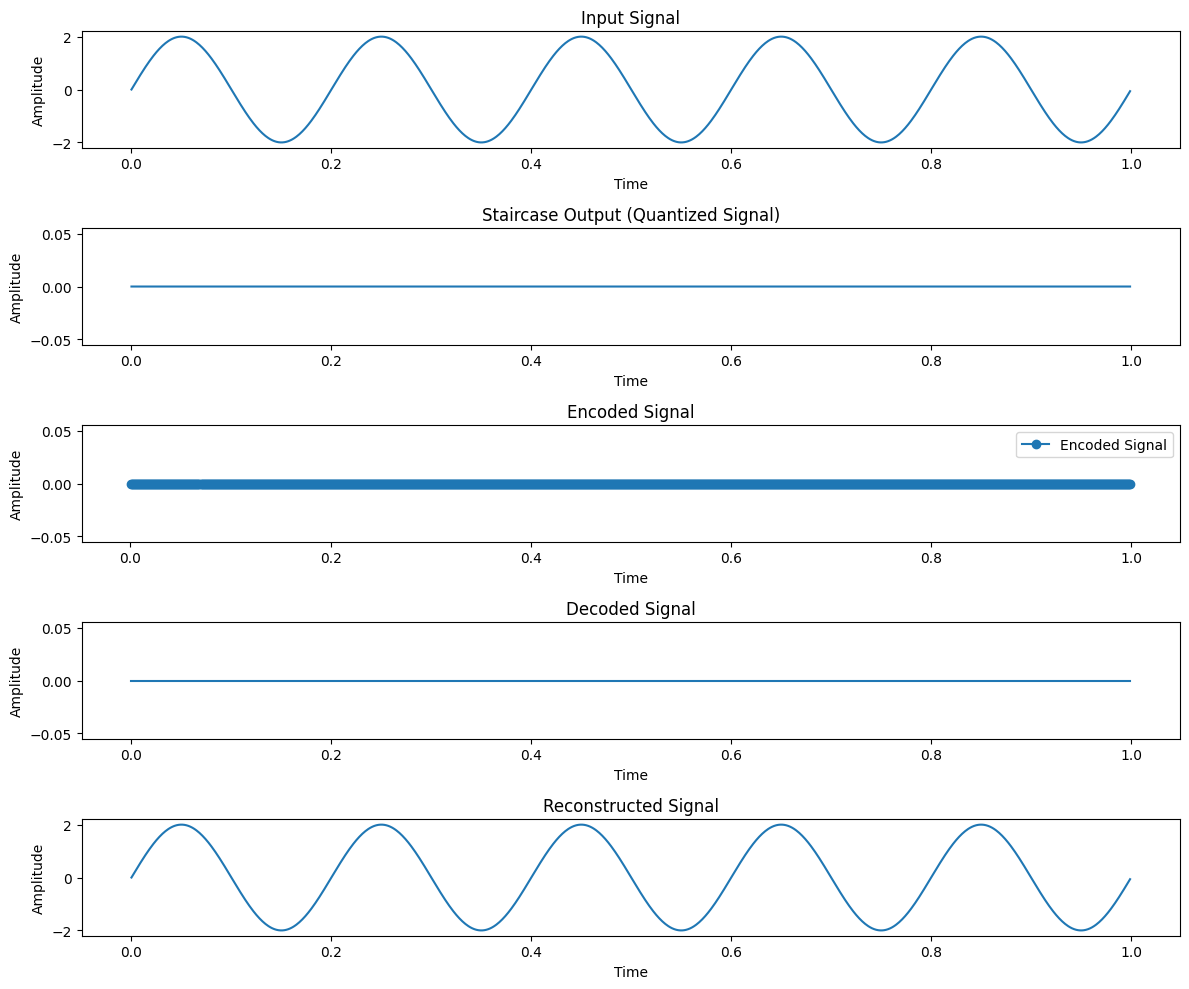

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Function for Adaptive Delta Modulation Encoder
def adaptive_delta_modulation_encoder(signal, step_size, beta):
    quantized_signal = np.zeros_like(signal)
    error = np.zeros_like(signal)
    step_size_values = []

    for i in range(1, len(signal)):
        delta = signal[i] - signal[i - 1]
        if delta >= step_size:
            quantized_signal[i] = quantized_signal[i - 1] + step_size
        elif delta <= -step_size:
            quantized_signal[i] = quantized_signal[i - 1] - step_size
        else:
            quantized_signal[i] = quantized_signal[i - 1]
        
        step_size = step_size * np.exp(beta * (delta ** 2))
        step_size_values.append(step_size)

    return quantized_signal, step_size_values

# Function for Adaptive Delta Modulation Decoder
def adaptive_delta_modulation_decoder(quantized_signal):
    decoded_signal = np.zeros_like(quantized_signal)

    for i in range(1, len(quantized_signal)):
        decoded_signal[i] = decoded_signal[i - 1] + quantized_signal[i]

    return decoded_signal

# Generate a sinusoidal signal
fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)
sinusoidal_signal = 2 * np.sin(2 * np.pi * 5 * t)  # 5 Hz sinusoidal signal

# Parameters for Adaptive Delta Modulation
initial_step_size = 0.1
beta = 0.01

# Encode the signal using Adaptive Delta Modulation
quantized_signal, step_size_values = adaptive_delta_modulation_encoder(sinusoidal_signal, initial_step_size, beta)

# Decode the signal using Adaptive Delta Modulation
decoded_signal = adaptive_delta_modulation_decoder(quantized_signal)

# Plot the signals
plt.figure(figsize=(12, 10))

plt.subplot(5, 1, 1)
plt.plot(t, sinusoidal_signal)
plt.title('Input Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 2)
plt.plot(t, quantized_signal, drawstyle='steps-pre')
plt.title('Staircase Output (Quantized Signal)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 3)
plt.plot(t[1:], quantized_signal[1:], 'o-', label='Encoded Signal')
plt.title('Encoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(t, decoded_signal)
plt.title('Decoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 5)
plt.plot(t, sinusoidal_signal - decoded_signal)
plt.title('Reconstructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


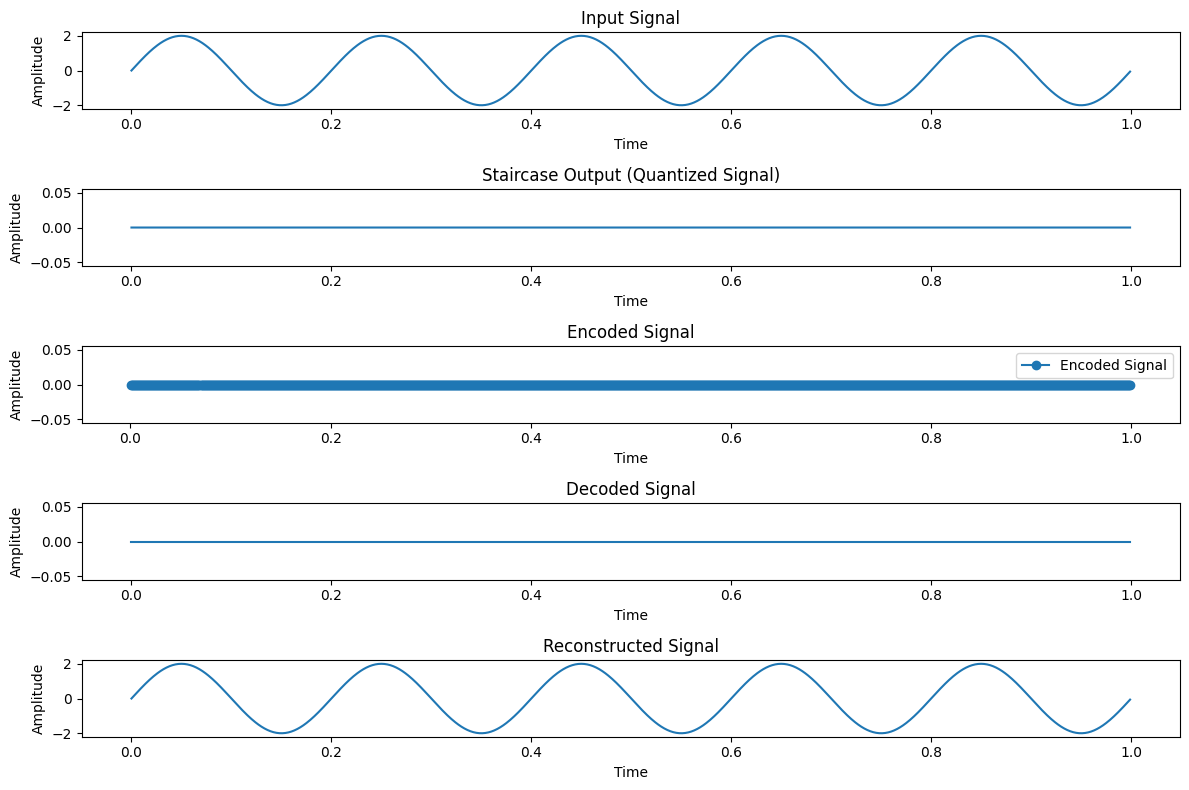

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Function for Adaptive Delta Modulation Encoder
def adaptive_delta_modulation_encoder(signal, step_size, beta):
    quantized_signal = np.zeros_like(signal)
    error = np.zeros_like(signal)
    step_size_values = []

    for i in range(1, len(signal)):
        delta = signal[i] - signal[i - 1]
        if delta >= step_size:
            quantized_signal[i] = quantized_signal[i - 1] + step_size
        elif delta <= -step_size:
            quantized_signal[i] = quantized_signal[i - 1] - step_size
        else:
            quantized_signal[i] = quantized_signal[i - 1]
        
        step_size = step_size * np.exp(beta * (delta ** 2))
        step_size_values.append(step_size)

    return quantized_signal, step_size_values

# Function for Adaptive Delta Modulation Decoder
def adaptive_delta_modulation_decoder(quantized_signal):
    decoded_signal = np.zeros_like(quantized_signal)

    for i in range(1, len(quantized_signal)):
        decoded_signal[i] = decoded_signal[i - 1] + quantized_signal[i]

    return decoded_signal

# Generate a sinusoidal signal
fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)
sinusoidal_signal = 2 * np.sin(2 * np.pi * 5 * t)  # 5 Hz sinusoidal signal

# Parameters for Adaptive Delta Modulation
initial_step_size = 0.1
beta = 0.01

# Encode the signal using Adaptive Delta Modulation
quantized_signal, step_size_values = adaptive_delta_modulation_encoder(sinusoidal_signal, initial_step_size, beta)

# Decode the signal using Adaptive Delta Modulation
decoded_signal = adaptive_delta_modulation_decoder(quantized_signal)

# Plot the signals
plt.figure(figsize=(12, 8))

plt.subplot(5, 1, 1)
plt.plot(t, sinusoidal_signal)
plt.title('Input Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 2)
plt.plot(t, quantized_signal, drawstyle='steps-pre')
plt.title('Staircase Output (Quantized Signal)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 3)
plt.plot(t[1:], quantized_signal[1:], 'o-', label='Encoded Signal')
plt.title('Encoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(t, decoded_signal)
plt.title('Decoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 5)
plt.plot(t, sinusoidal_signal - decoded_signal)
plt.title('Reconstructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


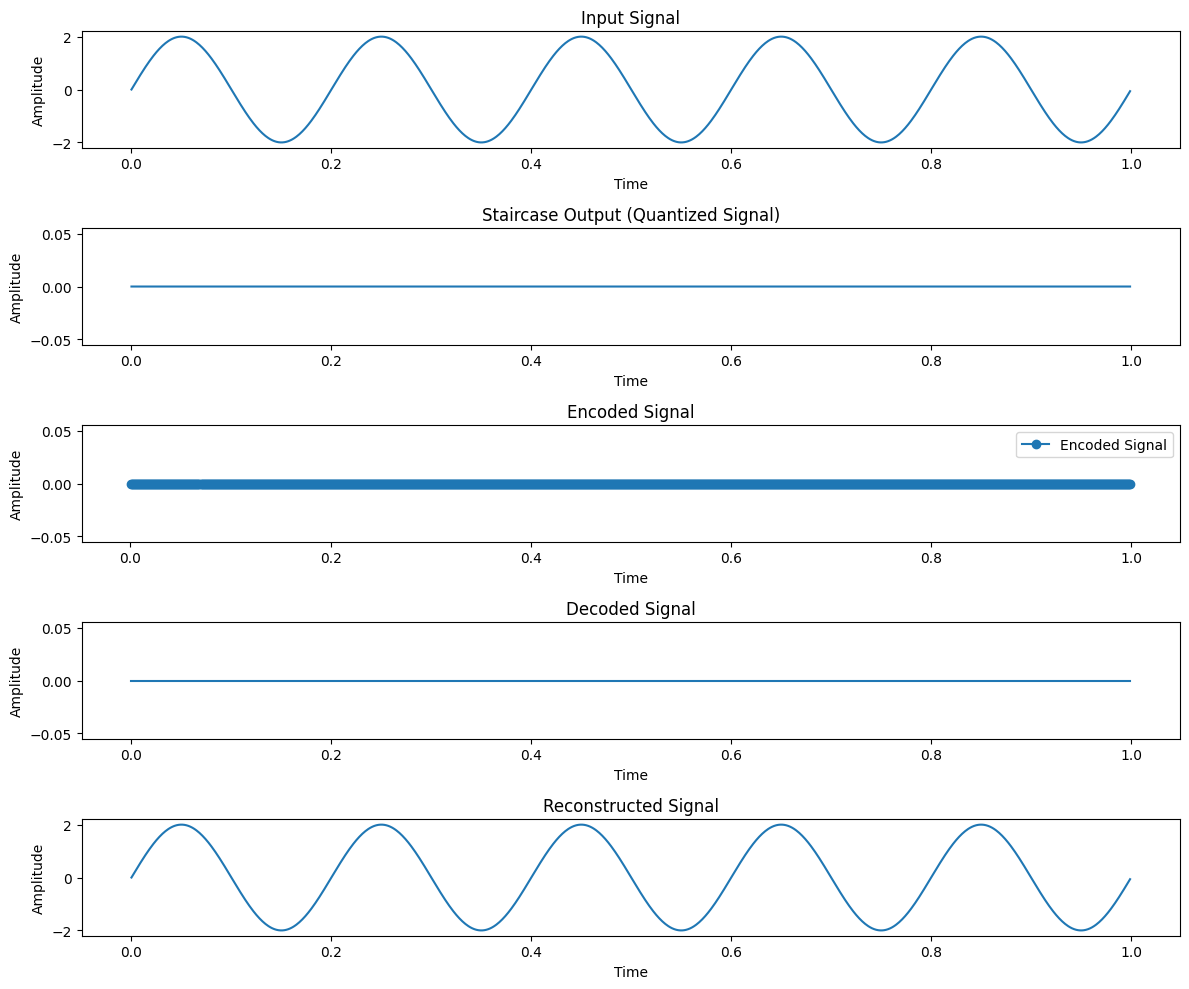

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Function for Adaptive Delta Modulation Encoder
def adaptive_delta_modulation_encoder(signal, step_size, beta):
    quantized_signal = np.zeros_like(signal)
    error = np.zeros_like(signal)
    step_size_values = []

    for i in range(1, len(signal)):
        delta = signal[i] - signal[i - 1]
        if delta >= step_size:
            quantized_signal[i] = quantized_signal[i - 1] + step_size
        elif delta <= -step_size:
            quantized_signal[i] = quantized_signal[i - 1] - step_size
        else:
            quantized_signal[i] = quantized_signal[i - 1]
        
        step_size = step_size * np.exp(beta * (delta ** 2))
        step_size_values.append(step_size)

    return quantized_signal, step_size_values

# Function for Adaptive Delta Modulation Decoder
def adaptive_delta_modulation_decoder(quantized_signal):
    decoded_signal = np.zeros_like(quantized_signal)

    for i in range(1, len(quantized_signal)):
        decoded_signal[i] = decoded_signal[i - 1] + quantized_signal[i]

    return decoded_signal

# Generate a sinusoidal signal
fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)
sinusoidal_signal = 2 * np.sin(2 * np.pi * 5 * t)  # 5 Hz sinusoidal signal

# Parameters for Adaptive Delta Modulation
initial_step_size = 0.1
beta = 100

# Encode the signal using Adaptive Delta Modulation
quantized_signal, step_size_values = adaptive_delta_modulation_encoder(sinusoidal_signal, initial_step_size, beta)

# Decode the signal using Adaptive Delta Modulation
decoded_signal = adaptive_delta_modulation_decoder(quantized_signal)

# Plot the signals
plt.figure(figsize=(12, 10))

plt.subplot(5, 1, 1)
plt.plot(t, sinusoidal_signal)
plt.title('Input Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 2)
plt.plot(t, quantized_signal, drawstyle='steps-pre')
plt.title('Staircase Output (Quantized Signal)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 3)
plt.plot(t[1:], quantized_signal[1:], 'o-', label='Encoded Signal')
plt.title('Encoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(t, decoded_signal)
plt.title('Decoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 5)
plt.plot(t, sinusoidal_signal - decoded_signal)
plt.title('Reconstructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


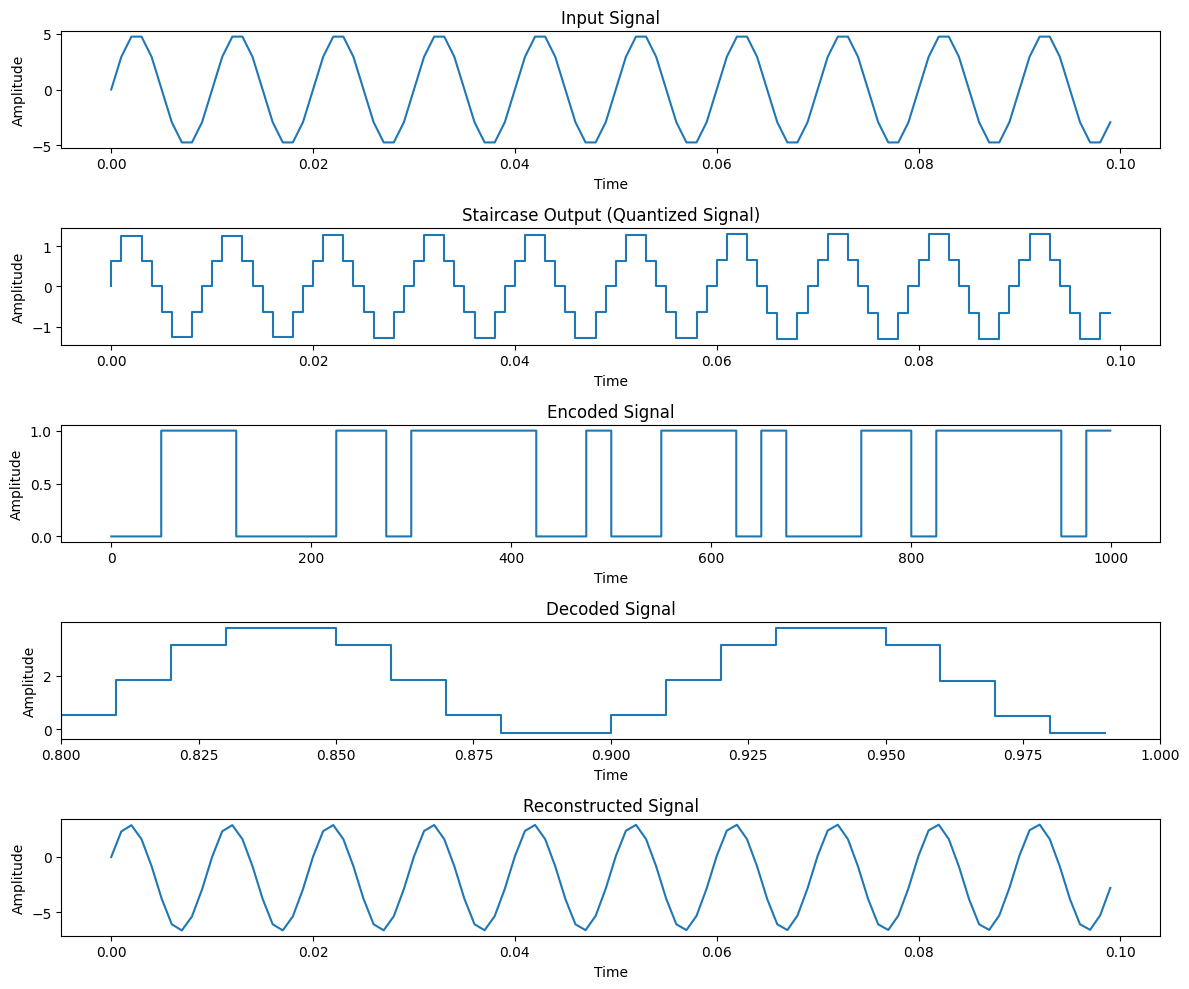

In [146]:
import numpy as np
import matplotlib.pyplot as plt

# Function for Adaptive Delta Modulation Encoder
def nrz_encode(data):
    encoded_data = []
    for bit in data:
        encoded_data.extend([bit] * 25)  # Each bit is represented by 100 samples
    return np.array(encoded_data)

def adaptive_delta_modulation_encoder(signal, step_size, beta):
    quantized_signal = np.zeros_like(signal)
    error = np.zeros_like(signal)
    step_size_values = []

    for i in range(1, len(signal)):
        delta = signal[i] - signal[i - 1]
        if delta >= step_size:
            quantized_signal[i] = quantized_signal[i - 1] + step_size
        elif delta <= -step_size:
            quantized_signal[i] = quantized_signal[i - 1] - step_size
        else:
            quantized_signal[i] = quantized_signal[i - 1]
        
        step_size = step_size * np.exp(beta * (delta ** 2))
        step_size_values.append(step_size)

    return quantized_signal, step_size_values

# Function for Adaptive Delta Modulation Decoder
def adaptive_delta_modulation_decoder(quantized_signal):
    decoded_signal = np.zeros_like(quantized_signal)

    for i in range(1, len(quantized_signal)):
        decoded_signal[i] = decoded_signal[i - 1] + quantized_signal[i]

    return decoded_signal

# Generate a sinusoidal signal
fs = 1000  # Sampling frequency
fm = 100     # Frequency of the sinusoidal signal
delta = 2 * np.pi * (fm / fs)

t = np.arange(0, 0.1, 1/fs)
t1 = np.arange(0, 1, 0.01)
sinusoidal_signal = 5 * np.sin(2 * np.pi * fm * t)

# Parameters for Adaptive Delta Modulation
initial_step_size = delta
beta = 0.0001

#  Generate binary data
binary_data = np.random.randint(0, 2, size=40)


# Encode the signal using Adaptive Delta Modulation
quantized_signal, step_size_values = adaptive_delta_modulation_encoder(sinusoidal_signal, initial_step_size, beta)

# Encode the data using NRZ encoding
encoded_data = nrz_encode(binary_data)

# Decode the signal using Adaptive Delta Modulation
decoded_signal = adaptive_delta_modulation_decoder(quantized_signal)

# Plot the signals
plt.figure(figsize=(12, 10))

plt.subplot(5, 1, 1)
plt.plot(t, sinusoidal_signal)
plt.title('Input Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 2)
plt.plot(t, quantized_signal,drawstyle='steps-pre')
plt.title('Staircase Output (Quantized Signal)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 3)
plt.step(range(len(encoded_data)), encoded_data, where='post')
plt.title('Encoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 4)
plt.plot(t1, decoded_signal,drawstyle='steps-pre')
plt.title('Decoded Signal')
plt.xlim(0.8,1.0)
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(5, 1, 5)
plt.plot(t, sinusoidal_signal - decoded_signal)
plt.title('Reconstructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


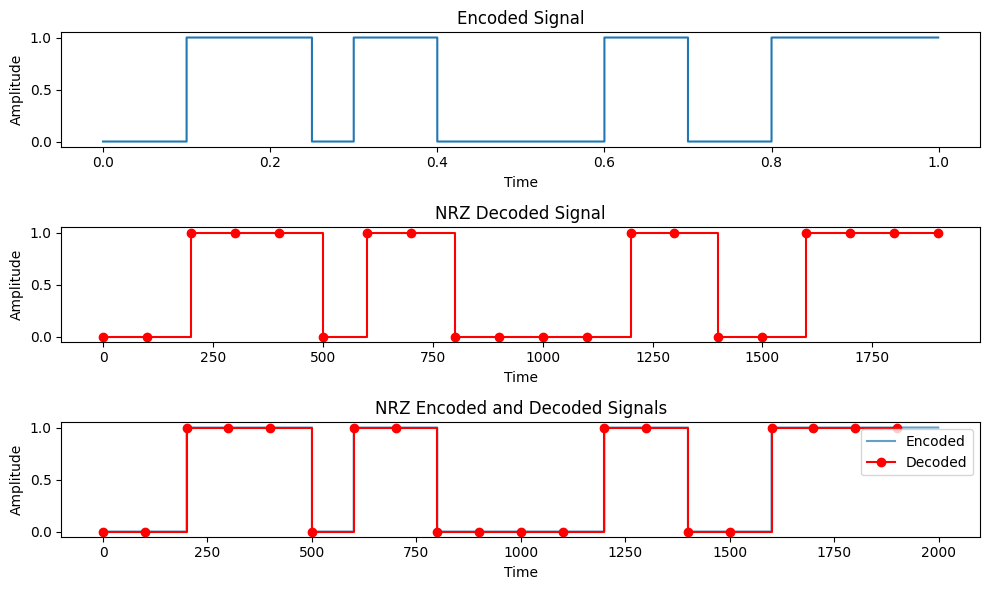

In [158]:
import numpy as np
import matplotlib.pyplot as plt

def nrz_encode(data):
    encoded_data = []
    for bit in data:
        encoded_data.extend([bit] * 100)  # Each bit is represented by 100 samples
    return np.array(encoded_data)

def nrz_decode(encoded_data, threshold=0.5):
    decoded_data = np.zeros(len(encoded_data) // 100)
    for i in range(0, len(encoded_data), 100):
        if np.mean(encoded_data[i:i+100]) > threshold:
            decoded_data[i // 100] = 1
    return decoded_data

# Generate binary data
binary_data = np.random.randint(0, 2, size=20)
t1 = np.arange(0, 1, 1/len(encoded_data))

# Encode the data using NRZ encoding
encoded_data = nrz_encode(binary_data)

# Decode the data using NRZ decoding
decoded_data = nrz_decode(encoded_data)

# Plot the signals
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.step(t1, encoded_data, where='post')
plt.title('Encoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.step(range(0, len(encoded_data), 100), decoded_data, where='post', color='red', marker='o')
plt.title('NRZ Decoded Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.step(range(len(encoded_data)), encoded_data, where='post', label='Encoded', alpha=0.7)
plt.step(range(0, len(encoded_data), 100), decoded_data, where='post', color='red', marker='o', label='Decoded')
plt.title('NRZ Encoded and Decoded Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


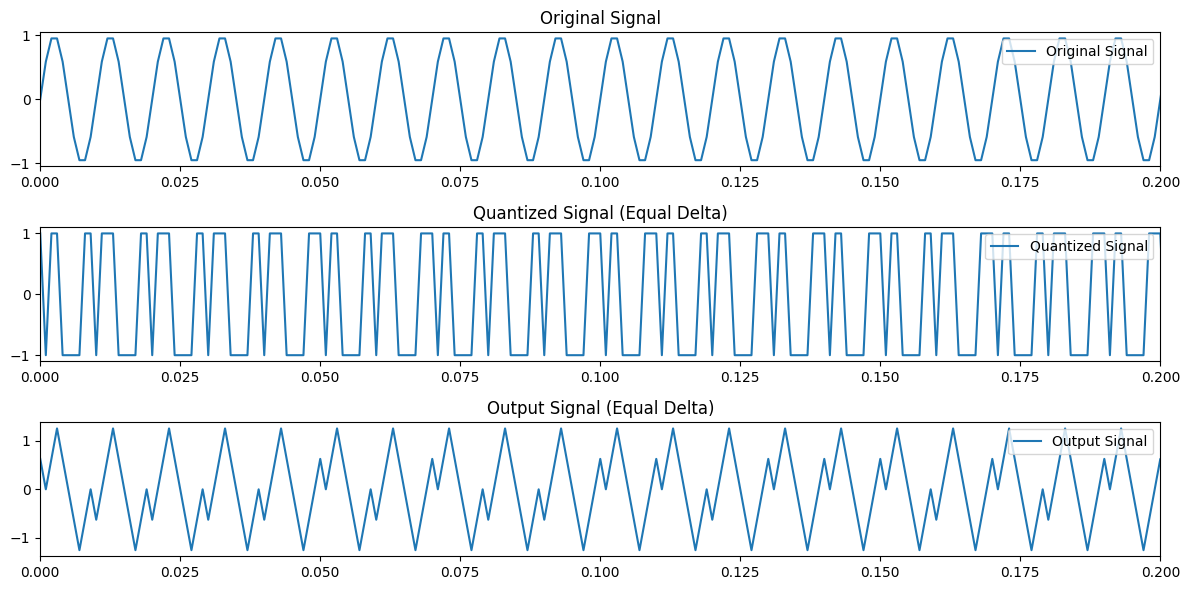

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def adaptive_delta_modulation(signal, fs, delta_type='equal'):
    # Signal parameters
    T = 1/fs
    t = np.arange(0, len(signal)*T, T)

    # Initialize variables
    delta = 2 * np.pi * (fm / fs) if delta_type == 'equal' else np.pi * (fm / fs)
    output_signal = np.zeros_like(signal)
    quantized_signal = np.zeros_like(signal)

    # Initial values
    prev_output = 0

    # Adaptive Delta Modulation loop
    for i in range(len(signal)):
        error = signal[i] - prev_output
        quantized_value = 1 if error >= 0 else -1
        quantized_signal[i] = quantized_value
        output_signal[i] = prev_output + delta * quantized_value
        prev_output = output_signal[i]

        # Adjust delta based on the error
        if delta_type == 'adaptive':
            delta *= np.exp(error)

    return t, signal, output_signal, quantized_signal

# Example usage
fs = 1000  # Sampling frequency
fm = 100    # Signal frequency
t = np.arange(0, 1, 1/fs)  # Time vector
signal = np.sin(2 * np.pi * fm * t)  # Example sinusoidal signal

# Run adaptive delta modulation with equal delta
t_equal, signal_equal, output_equal, quantized_equal = adaptive_delta_modulation(signal, fs, delta_type='equal')

# Run adaptive delta modulation with adaptive delta
t_adaptive, signal_adaptive, output_adaptive, quantized_adaptive = adaptive_delta_modulation(signal, fs, delta_type='adaptive')

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(t_equal, signal_equal, label='Original Signal')
plt.xlim(0.0,0.2)
plt.title('Original Signal')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t_equal, quantized_equal, label='Quantized Signal')
plt.title('Quantized Signal (Equal Delta)')
plt.xlim(0.0,0.2)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t_equal, output_equal, label='Output Signal')
plt.title('Output Signal (Equal Delta)')
plt.xlim(0.0,0.2)
plt.legend()

plt.tight_layout()
plt.show()
